# Домашнее задание

В данном задании предлагается решить несколько задач на использование функций библиотек `numpy`, `matplotlib` и `pandas`.
Во всех заданиях предполагается, что все аргументы функций, которые нужно реализовать, имеют тип `numpy.array` либо являются числами. Возвращать нужно также либо `numpy.array`, либо число. Кроме того, предполагается, что все аргументы корректны, и проверять их на корректность не нужно.

При реализации запрещается пользоваться любыми циклами, в том числе стандартными функциями языка, которые заменяют циклы. Можно использовать любые функции библиотек `numpy`.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

%matplotlib inline

# Задача 1.

**Задача 1.** Индексация массивов. Необходимо написать функцию, которая создает матрицу размера NxN, N > 1 следующим образом: 
все крайние элементы равны 1, а все остальные (внутренние) равны 0.
В данной задаче не требуется написать решение одной операцией или в одну строку, но требуется использовать функционал `numpy`

Ожидаемый вывод при n=5:
```
array([[1., 1., 1., 1., 1.],
       [1., 0., 0., 0., 1.],
       [1., 0., 0., 0., 1.],
       [1., 0., 0., 0., 1.],
       [1., 1., 1., 1., 1.]])
```


In [2]:
def create_boarded_array(n):
    '''
    Функция создает np.array, у которого крайние элементы = 1, остальные = 0.
    '''
    arr = np.zeros((n,n))
    arr[[0,n-1],:] = 1
    arr[:,[0,n-1]] = 1
    return arr

In [3]:
ans = np.array([[1., 1., 1.], 
                [1., 0., 1.],
                [1., 1., 1.]])

assert (ans == create_boarded_array(3)).all(), "Неправильный вывод при n=3"


# Задача 2.


**Задача 2.** Создать массив "шахматная доска" - размер nхn, где на месте белых клеток находятся единицы, а на месте черных клеток - нули. В верхней левой клетке всегда стоит 1.

Ожидаемый результат при n = 8:
```
[[1 0 1 0 1 0 1 0]
 [0 1 0 1 0 1 0 1]
 [1 0 1 0 1 0 1 0]
 [0 1 0 1 0 1 0 1]
 [1 0 1 0 1 0 1 0]
 [0 1 0 1 0 1 0 1]
 [1 0 1 0 1 0 1 0]
 [0 1 0 1 0 1 0 1]]
 ```


In [4]:
def chess_table(n):
    arr = np.ones((n,n))
    arr[0:n:2,1:n:2] = 0
    arr[1:n:2,0:n:2] = 0
    return arr

In [5]:
ans = np.array([[1., 0., 1., 0., 1.],
               [0., 1., 0., 1., 0.],
               [1., 0., 1., 0., 1.],
               [0., 1., 0., 1., 0.],
               [1., 0., 1., 0., 1.]])

assert (chess_table(5) == ans).all(), 'Неправильный ответ при n=5'


# Задача 3.

Имеется массив prices с ценами на нефть с 1989 по 2015 годы.

In [6]:
prices = np.array([18.2, 23.7, 20.0, 19.3, 17.0, 15.8, 17.0, 20.6, 19.1, 12.8, 17.8,
                  28.5, 24.4, 24.9, 28.5, 37.9, 55.1, 66.0, 72.7, 98.4, 62.8, 80.2, 110.9, 109.5,
                  108.8, 99.5, 53.7])

**3.1** Напишите функцию, которая вернет 4 числа: минимальная цена на нефть, максимальная цена на нефть, средняя цена на нефть и стандартное отклонение цен. Все числа округлить до ближайшего целого.

In [7]:
def get_stat(prices):
    return (round(prices.min()), round(prices.max()), round(prices.mean()), round(prices.std()))

In [8]:
assert np.isclose(13, get_stat(prices)[0]), 'Неправильно найдена минимальная цена'
assert np.isclose(111, get_stat(prices)[1]), 'Неправильно найдена максимальная цена'


**3.2** Постройте график для цен, по оси x отложены годы, по оси y отложены значений цен. Отобразите на графике все, что сочтете нужным (точки значений цены, подпись осей и т.д.)

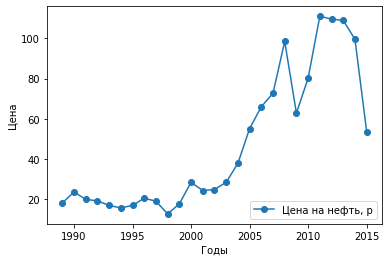

In [9]:
# YOUR CODE HERE
years = np.arange(1989, 2016)
plt.figure(figsize=(6, 4))
plt.plot(years, prices, label="Цена на нефть, р", marker='o')
plt.xlabel("Годы")
plt.ylabel("Цена")
plt.legend(loc="lower right")
plt.show()

# Задача 4.

**Задача 4.** Даны массивы `x` и `y`. Исользуя `matplotlib`, постройте на одном координатном поле две линии: 
1. $y = e^x$ - сплошную синюю линию
2. $y = x$ - красную пунктирную линию
3. добавьте точки данных на линии в виде маркеров
4. добавьте координатную сетку на график
5. добавьте легенду на график
6. добавьте названия осей
7. добавьте название графика (title) 

In [10]:
x = np.arange(1,4,0.1)

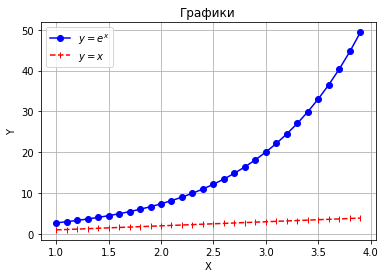

In [11]:
y1 = np.e**x
y2 = x
plt.figure(figsize=(6, 4))
plt.plot(x, y1, 'bo-', label="$y=e^{x}$")
plt.plot(x, y2, 'r|--', label="$y=x$")
plt.xlabel("X")
plt.ylabel("Y")
plt.legend(loc="upper left")
plt.title("Графики")
plt.grid()
plt.show()

# Задача 5.

**5.1** Считайте датасет 'Boston.csv'. Подробное описание колонок датасета можно найти тут https://www.kaggle.com/c/boston-housing

**Внимание:** первая колонка датасета - индексы, считайте таблицу так, чтобы индексация шла по ней (используйте аргумент index_col). От этого будет зависеть индексация в следующих заданиях.

In [12]:
# YOUR CODE HERE
df = pd.read_csv('Boston.csv', index_col=0)

In [13]:
assert (len(df)) == 506


**5.2** Выведите размер таблицы и первые 5 строк

In [14]:
# YOUR CODE HERE
print(df.shape)
df.head()

(506, 14)


,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
1,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
2,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
3,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
5,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [15]:
assert df.shape == (506, 14), 'Неверный размер таблицы'


**5.3** В переменную max_tax записать максимальное значение столбца tax

In [16]:
max_tax = 0
max_tax = df["tax"].max()
print(max_tax)

711


In [17]:
assert max_tax > 700

**5.4** В переменную min_crim записать значение 'crim' у строки с минимальным значением 'age'

In [18]:
min_crim = 0
min_age = df["age"].min()
min_crim = df.loc[df["age"] == min_age].iloc[0]["crim"]

In [19]:
assert min_crim < 0.2


**5.5** Индексы всех строк с максимальным значением столбца nox записать в переменную top_nox_ind

In [20]:
top_nox_ind = []
max_nox = df["nox"].max()
top_nox_ind = df.loc[df["nox"] == max_nox].index.tolist()

In [21]:
assert 143 in top_nox_ind
assert 157 in top_nox_ind


**5.6** В переменную k записать количество строк, для которых rm >= 7 и tax <= 270

In [22]:
k = 0
k = df[(df["rm"] >= 7) & (df["tax"] <= 270)].shape[0]

In [23]:
assert k > 20
assert k < 50
